# Exemplo -- Vibração Livre não amortecida

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
from matplotlib import animation
import ipywidgets as widgets
import IPython.display

## Problema

No sistema mostrado a seguir, as massas devem ser consideradas corpos rígidos, com inércia rotativa e translacional. As rotações devem ser consideradas pequenas.
                
As massas são iguais a 1kg e as todas as molas são idênticas, com rigidez igual a 40N/m. O comprimento das  barras é 0,5m e a distância entre as barras é igual ao seu comprimento.

Calcule as frequências naturais e modos normais do sistema, e a resposta quando o sistema é submetido a algum deslocamento inicial.
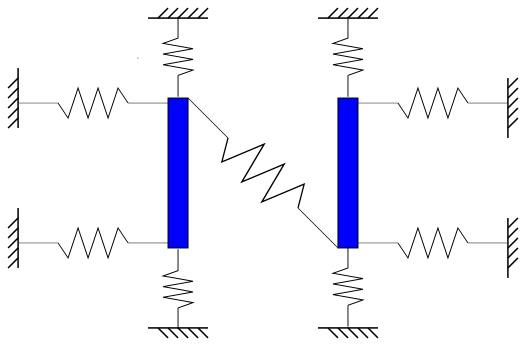

### Proprieadades mecânicas

In [2]:
M = 1.0
L = 0.5
K = 40.0

## Coordenadas generalizadas


Cada barra tem três graus de liberdade, já que são corpos rígidos no plano.

Vamos escolher as coordenadas generalizadas mostrada na figura ao lado, translações nas direções horizontal e vertical, e a rotação em torno do centro de gravidade da barra.
           
Percebam que, por inspeção, verificamos que uma aceleração em qualquer uma destas coordenadas não causa aceleração em nenhuma outra, então a matriz de massa é diagonal e poderá ser determinada   facilmente.
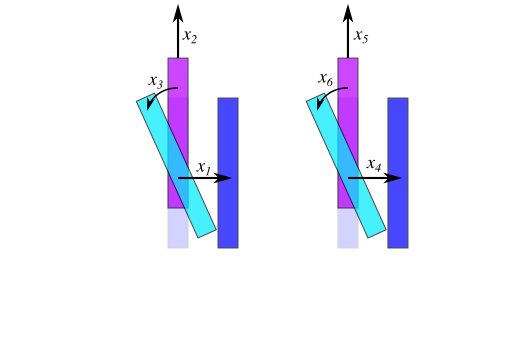

## Matriz de massa

Sabendo que o momento de inércia de uma barra em relação ao seu centro de gravidade é $ML^2/12$, a matriz de massa pode ser escrita diretamente, por inspeção, como

$$ \mathbf{m} = \begin{bmatrix}
M &&&& \\
& M &&&& \\ 
&& ML^2/12 && \\
&&& M & \\
&&&& M \\
&&&&& ML^2/12 
\end{bmatrix}$$

In [3]:
m = np.diag([M, M, M*L**2/12, M, M, M*L**2/12])
display(m)

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02083333, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02083333]])

## Coeficientes de influência

Vamos determinar a matriz de rigidez com o método dos coeficientes de influência de rigidez.

Neste método, aplicamos um deslocamento unitário na direção de uma coordenada generalizada, enquanto mantemos todas as outras com deslocamento nulo.

As forças necessárias para manter esta configuração em equilíbrio estático são exatamente as entradas da coluna correspondente a este grau de liberdade na matriz de rigidez, isto é, $k_{ij}$ é a força na direção da coordenada $i$ necessária para manter o equlíbrio quando o deslocamento unitário é aplicado na direção $j$.

É importante perceber que, para pequenas rotações, uma mola colinear com uma barra não tem efeito sobre um deslocamento perpendicular a ela.

Vamos admitir que os sentidos positivos sao para a direita, para cima e anti-horário.


Precisamos calcular molas equivalentes nas direções horizontal e vertical correspondentes
             à mola inclinada que acopla as duas massas. Da geometria, o ângulo $\alpha$ é $45^\circ$.   
             
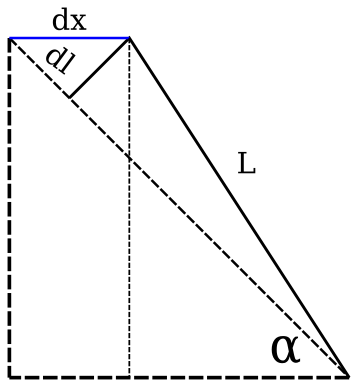

Para o deslocamento horizontal $dx$ mostrado, o comprimento da mola varia de $dl = dx \cos\alpha$. Pela equivalência de 
             energia potencial, 
             $$ \frac{1}{2}k_\text{eq} dx^2 =  \frac{1}{2}K dl^2 =  \frac{1}{2}K (dx\cos\alpha)^2,$$
             então $k_\text{eq} = K \cos^2\alpha$.

Como $\alpha = 45^\circ$, $\cos\alpha = \sqrt{2}/{2}$, então $k_\text{eq} = K/2$.
      
Na direção vertical temos o mesmo valor de mola equivalente, já que o ângulo é o mesmo. Obviamente este só é o caso  para este ângulo específico!



### Deslocamento unitário em $x_1$


A figura ao lado mostra, em vermelho, as forças internas, e em verde, as forças externas, necessárias para manter o equilíbrio quando $x_1 = 1$ e os demais são nulos.

Estamos tratando momentos como forças generalizadas.  

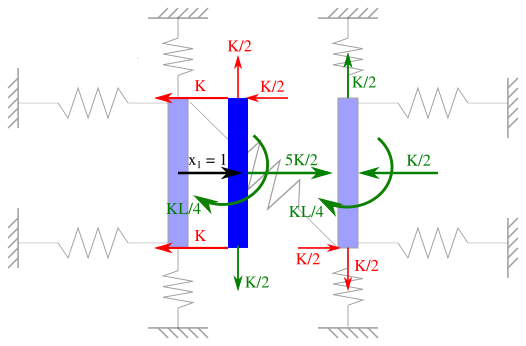

Por inspeção, $k_{11} = 2.5K$, $k_{21} = -0.5K$, $k_{31} = -0.25KL$, $k_{41} = -0.5K$ , $k_{51} = -0.5K$, $k_{61} = -0.25KL$.

### Deslocamento unitário em $x_2$


A figura ao lado mostra, em vermelho, as forças internas, e em verde, as forças externas, necessárias para manter o equilíbrio quando $x_2 = 1$ e os demais são nulos.

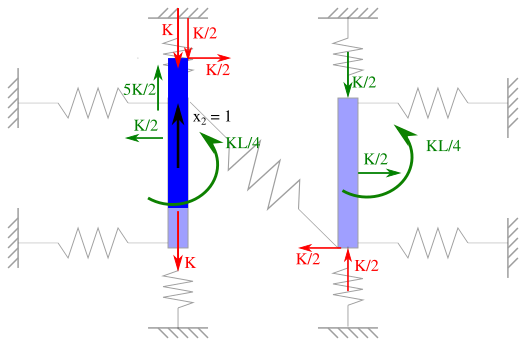

Por inspeção, $k_{12} = -0.5K$, $k_{22} = 2.5K$, $k_{32} = +0.25KL$, $k_{42} = 0.5K$ , $k_{52} = -0.5K$, $k_{62} = 0.25KL$.

Não é estritamente necessário calcular $k_{12}$, pois já calculamos $k_{21}$.

### Deslocamento unitário em $x_3$

Para uma rotação unitária $x_3 =1$, o deslocamento na extremidade superior da barra esquerda é $x_3L/2 = L/2$, na horizontal apontando para a esquerda, já que estamos falando de pequenas rotações apenas. Por esta razão também a componente vertical da força devida à mola inclinada não produz momento nesta configuração.

A figura ao lado mostra, em vermelho, as forças internas, e em verde, as forças externas, necessárias para manter   o equilíbrio quando $x_3 = 1$ e os demais são nulos.

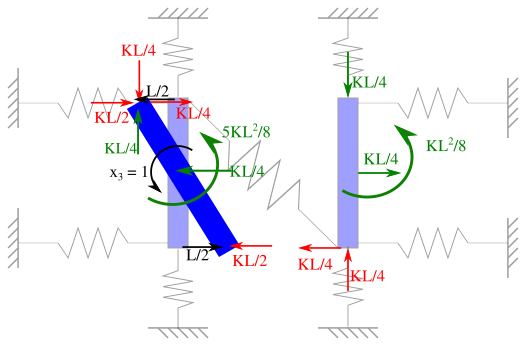

Por inspeção, $k_{13} = -0.25KL$, $k_{23} = 0.25KL$, $k_{33} = 0.625KL^2$, $k_{43} = 0.25KL$ , $k_{53} = -0.25KL$, $k_{63} = 0.125KL^2$.
           
Só precisamos calcular de $k_{33}$ ``para a frente''.

### Deslocamento unitário em $x_4$

Para um deslocamento unitário $x_4 =1$, a configuração é ``simétrica'' em relação àquela correspondente ao deslocamento unitário em $x_1$.

A figura ao lado mostra, em vermelho, as forças internas, e em verde, as forças externas, necessárias para manter o equilíbrio quando $x_4 = 1$ e os demais são nulos.

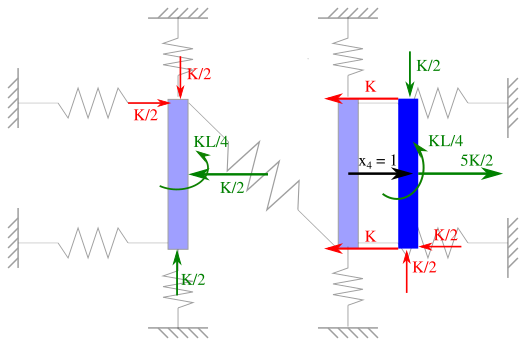

Por inspeção, $k_{14} = -0.5K$, $k_{24} = 0.5K$, $k_{34} = 0.25KL$, $k_{44} = 2.5K$ , $k_{54} = -0.5K$, $k_{64} = 0.25KL$.

Só precisamos realmente calcular de $k_{44}$ ``para a frente''.

### Deslocamento unitário em $x_5$

Para um deslocamento unitário $x_5 =1$, a configuração é ``simétrica'' em relação àquela correspondente ao deslocamento unitário em $x_2$.

A figura abaixo mostra, em vermelho, as forças internas, e em verde, as forças externas, necessárias para manter o equilíbrio quando $x_5 = 1$ e os demais são nulos.

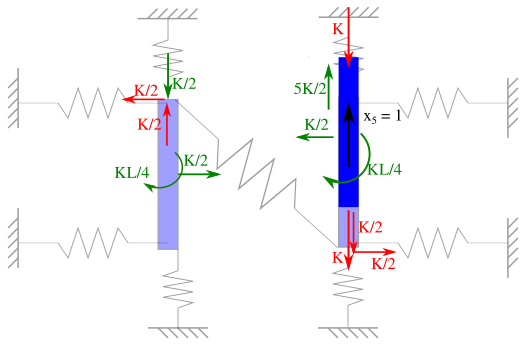

Por inspeção, $k_{15} = -0.5K$, $k_{25} = -0.5K$, $k_{35} = -0.25KL$, $k_{45} = -0.5K$ , $k_{55} = 2.5K$, $k_{65} = -0.25KL$.
            
Só precisamos realmente calcular de $k_{55}$ ``para a frente''.

### Deslocamento unitário em $x_6$

Para uma rotação unitária $x_6 =1$, o deslocamento na extremidade superior da barra esquerda é $x_6L/2 = L/2$, na horizontal apontando para a esquerda, já que estamos falando de pequenas rotações apenas. Por esta razão também a componente vertical da força devida à mola inclinada não produz momento nesta configuração.

A figura abaixo mostra, em vermelho, as forças internas, e em verde, as forças externas, necessárias para manter o equilíbrio quando $x_6 = 1$ e os demais são nulos.

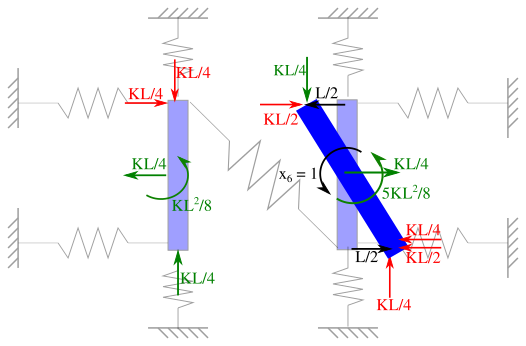
            
Por inspeção, $k_{16} = -0.25KL$, $k_{26} = 0.25KL$, $k_{36} = 0.125KL^2$, $k_{46} = 0.25KL$ , $k_{56} = -0.25KL$, $k_{66} = 0.625KL^2$.

Se todo o resto estivesse certo, só precisaríamos calcular $x_6$.

###  Matrix de rigidez

Coletando todos os termos, ficamos com
             
$$ \mathbf{k} = K
\begin{bmatrix}
2.5     &  -0.5    &  -0.25L    &  -0.5   &   -0.5   & -0.25L \\
-0.5    &   2.5    &   0.25L    &   0.5   &  -0.5   &  0.25L\\
-0.25L  &   0.25L  &   0.625L^2 &   0.25L &  -0.25L & 0.125L^2\\
-0.5    &   0.5    &   0.25L    &   2.5   &  -0.5   &  0.25L\\
-0.5    &  -0.5    &  -0.25L    &  -0.5   &   2.5   & -0.25L\\
-0.25L  &   0.25L  &   0.125L^2  &  0.25L  &  -0.25L &  0.625L^2
\end{bmatrix}.$$

Para os dados do problema, ficamos com

In [4]:
k = K*np.array([[2.5,    -0.5,    -0.25*L,    -0.5,    -0.5,   -0.25*L],
                 [-0.5,    2.5,     0.25*L,     0.5,    -0.5,    0.25*L],
                 [-0.25*L, 0.25*L,  0.625*L**2, 0.25*L, -0.25*L, 0.125*L**2],
                 [-0.5,    0.5,     0.25*L,     2.5,    -0.5,    0.25*L],
                 [-0.5,   -0.5,    -0.25*L,    -0.5,     2.5,   -0.25*L], 
                 [-0.25*L, 0.25*L,  0.125*L**2, 0.25*L, -0.25*L, 0.625*L**2]])
display(k)

array([[100.  , -20.  ,  -5.  , -20.  , -20.  ,  -5.  ],
       [-20.  , 100.  ,   5.  ,  20.  , -20.  ,   5.  ],
       [ -5.  ,   5.  ,   6.25,   5.  ,  -5.  ,   1.25],
       [-20.  ,  20.  ,   5.  , 100.  , -20.  ,   5.  ],
       [-20.  , -20.  ,  -5.  , -20.  , 100.  ,  -5.  ],
       [ -5.  ,   5.  ,   1.25,   5.  ,  -5.  ,   6.25]])

## Frequências naturais e modos de vibração

A equação que gera as frequências naturais e modos normais é
$$ \left( \mathbf{k} - \omega^2 \mathbf{m}\right) \mathbf X = \mathbf{0}.$$

Com a escolha de coordenadas generalizadas feita, a matriz de massa é diagonal, isto é, não há acoplamento inercial, mas a matriz de rigidez é completamente cheia, isto é, há acoplamento elástico entre todas as coordenadas generalizadas!

Como a matriz de massa é diagonal, sua inversa é trivial, vamos então pré-multiplicar a equação acima pela inversa da matriz de massa, 

$$\begin{align*}
\left(\mathbf{k} - \omega^2 \mathbf{m}\right) \mathbf X &= \mathbf{0} \\
\mathbf{k} \mathbf X &= \omega^2 \mathbf{m}  \mathbf X  \\
 \mathbf{m}^{-1}\mathbf{k} \mathbf X &= \omega^2 \mathbf{m}^{-1}\mathbf{m}  \mathbf X  \\
 \mathbf{D}^{-1}\mathbf X &= \omega^2 \mathbf{I}\mathbf X  \\
\end{align*}$$

o que leva ao problema de autovalores e autovetores
$$  \omega^2 \mathbf X =
\mathbf{D}^{-1}\mathbf X, $$

que vamos resolver computacionalmente.

In [5]:
Di = np.linalg.inv(m)@k
display(Di)

array([[ 100.,  -20.,   -5.,  -20.,  -20.,   -5.],
       [ -20.,  100.,    5.,   20.,  -20.,    5.],
       [-240.,  240.,  300.,  240., -240.,   60.],
       [ -20.,   20.,    5.,  100.,  -20.,    5.],
       [ -20.,  -20.,   -5.,  -20.,  100.,   -5.],
       [-240.,  240.,   60.,  240., -240.,  300.]])

In [6]:
uvals, uvecs = np.linalg.eig(Di)
display(uvals)
display(uvecs)

array([397.45983223,  52.84449074, 120.        , 109.69567703,
        80.        , 240.        ])

array([[-2.59169398e-02,  5.12722271e-01, -7.07106781e-01,
         1.02377651e-01, -1.62712650e-16, -5.18457713e-17],
       [ 2.91824792e-02,  2.42516404e-01,  3.23554614e-15,
        -2.40280081e-01, -7.07106781e-01,  1.40929642e-16],
       [ 7.06028820e-01,  4.22257821e-01, -7.69560153e-15,
         6.57102959e-01, -5.34722814e-16, -7.07106781e-01],
       [ 2.91824792e-02,  2.42516404e-01,  1.73067014e-15,
        -2.40280081e-01,  7.07106781e-01,  6.59219014e-17],
       [-2.59169398e-02,  5.12722271e-01,  7.07106781e-01,
         1.02377651e-01, -4.13849194e-16,  1.08751251e-16],
       [ 7.06028820e-01,  4.22257821e-01, -7.93955888e-15,
         6.57102959e-01, -1.06207875e-15,  7.07106781e-01]])

### Ordenação

Percebam que os autovalores não saem em alguma ordem pré-especificada, precisamos ordená-los em ordem crescente.

In [7]:
idx = uvals.argsort()
vals = uvals[idx]
vecs = uvecs[:,idx]
display(vals)

array([ 52.84449074,  80.        , 109.69567703, 120.        ,
       240.        , 397.45983223])

### Frequências naturais

As frequências naturais e os modos normais correspondentes são então 


In [8]:
ws = np.sqrt(vals)
for w, v in zip(ws, vecs.T):
   print(f'Frequência natural: {w}\n   Modo de vibração: {v}\n')

Frequência natural: 7.269421623345975
   Modo de vibração: [0.51272227 0.2425164  0.42225782 0.2425164  0.51272227 0.42225782]

Frequência natural: 8.94427190999916
   Modo de vibração: [-1.62712650e-16 -7.07106781e-01 -5.34722814e-16  7.07106781e-01
 -4.13849194e-16 -1.06207875e-15]

Frequência natural: 10.473570404934213
   Modo de vibração: [ 0.10237765 -0.24028008  0.65710296 -0.24028008  0.10237765  0.65710296]

Frequência natural: 10.954451150103326
   Modo de vibração: [-7.07106781e-01  3.23554614e-15 -7.69560153e-15  1.73067014e-15
  7.07106781e-01 -7.93955888e-15]

Frequência natural: 15.491933384829668
   Modo de vibração: [-5.18457713e-17  1.40929642e-16 -7.07106781e-01  6.59219014e-17
  1.08751251e-16  7.07106781e-01]

Frequência natural: 19.936394664906604
   Modo de vibração: [-0.02591694  0.02918248  0.70602882  0.02918248 -0.02591694  0.70602882]



## Visualização


In [9]:
#@ Title Code
b = 0.1*L
h = L
b2 = 0.5*b
h2 = 0.5*h

choose_mode = widgets.SelectionSlider(
    options=[str(i) for i in range(1, ws.size+1)],
    value='1', # Defaults to 'pineapple'
    description='Modo:',
    disabled=False)

@widgets.interact
def make_plot(mode=choose_mode):
    # Original positions. Be careful angles are in degrees!
    o1 = np.array([-b2, -h2])
    o2 = o1 + np.array([2*h, 0.0])
    r1 = Rectangle(o1, b, h, angle=0.0, rotation_point='center', alpha=0.25)
    r2 = Rectangle(o2, b, h, angle=0.0, rotation_point='center', fc='red', alpha=0.25)

    ##  Displaced position
    # Normalize displacements
    mode = int(mode)-1
    X = vecs[:,mode]
    X = X/X.max()*5*b

    p1 = o1 + X[0:2]
    a1 = np.degrees(X[2])
    p2 = o2 + X[3:5]
    a2 = np.degrees(X[5])

    rf1 = Rectangle(p1, b, h, angle=a1, rotation_point='center', alpha=1)
    rf2 = Rectangle(p2, b, h, angle=a2, rotation_point='center', fc='red', alpha=1)

    # Plot setup
    fig, ax = plt.subplots()
    fig.set_size_inches(8,6)
    ax.set_xlim([-h,3*h])
    ax.set_ylim([-h, h])
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.set_title(f'Modo de vibração para o modo {mode+1},' +
                    r' $\omega = {}$'+f'{ws[mode]:7.4f}')

    # Plot original position
    ax.add_patch(r1)
    ax.add_patch(r2)

    # Plot final position
    ax.add_patch(rf1)
    ax.add_patch(rf2)

interactive(children=(SelectionSlider(description='Modo:', options=('1', '2', '3', '4', '5', '6'), value='1'),…

## Normalização

Não é estritamente necessário, mas vamos normalizar os modos de vibração, já que isto será útil no futuro.

Para os modos calculados, os coeficiented de massa generalizados são dados por
$$\DeclareMathOperator{\diag}{diag} M_{ii} = \diag \left(   \overline{\mathbf X}^T \mathbf m \overline{\mathbf X} \right),$$
onde $\overline{\mathbf X}$ é a matrix modal, o que chamamos de *vecs* aqui no código.

In [10]:
Mg = vecs.T@m@vecs
display(Mg)
Mg = np.diag(Mg)
display(Mg)

array([[ 6.50825902e-01, -1.16245368e-16, -3.60958812e-16,
         4.83032459e-16,  7.77420966e-17, -1.11052269e-16],
       [-1.16245368e-16,  1.00000000e+00,  1.94965592e-16,
        -1.24168838e-15, -6.08071687e-17,  9.92124444e-17],
       [-3.60958812e-16,  1.94965592e-16,  1.54422414e-01,
        -2.05606812e-15, -4.76017655e-17,  5.50234993e-18],
       [ 4.83032459e-16, -1.24168838e-15, -2.05606812e-15,
         1.00000000e+00,  1.09965413e-16,  4.22218331e-18],
       [ 7.83652914e-17, -6.08071687e-17, -4.79817295e-17,
         1.09965413e-16,  2.08333333e-02,  1.90160424e-18],
       [-1.12163798e-16,  9.92124444e-17,  5.12238595e-18,
         4.22218331e-18,  1.90098092e-18,  2.38164720e-02]])

array([0.6508259 , 1.        , 0.15442241, 1.        , 0.02083333,
       0.02381647])

Cada modo de vibração é normalizado com $X_i = X_i/\sqrt{M_{ii}}$, então a matriz modal torna-se

In [11]:
Xm = vecs / np.sqrt(Mg)
display(Xm)

array([[ 6.35550065e-01, -1.62712650e-16,  2.60525352e-01,
        -7.07106781e-01, -3.59198040e-16, -1.67936465e-01],
       [ 3.00613656e-01, -7.07106781e-01, -6.11452326e-01,
         3.23554614e-15,  9.76389201e-16,  1.89096491e-01],
       [ 5.23413943e-01, -5.34722814e-16,  1.67216163e+00,
        -7.69560153e-15, -4.89897949e+00,  4.57492222e+00],
       [ 3.00613656e-01,  7.07106781e-01, -6.11452326e-01,
         1.73067014e-15,  4.56720330e-16,  1.89096491e-01],
       [ 6.35550065e-01, -4.13849194e-16,  2.60525352e-01,
         7.07106781e-01,  7.53450770e-16, -1.67936465e-01],
       [ 5.23413943e-01, -1.06207875e-15,  1.67216163e+00,
        -7.93955888e-15,  4.89897949e+00,  4.57492222e+00]])

Cuidado que nesta o0peração usamos o broadcasting do Numpy, o que não é uma coisa super óbvia.

Verificando,

In [12]:
display(np.sqrt(np.diag(Xm.T@k@Xm)))

array([ 7.26942162,  8.94427191, 10.4735704 , 10.95445115, 15.49193338,
       19.93639466])

que são exatamente as frequências naturais, como esperado.

## Resposta

Para calcular as amplitudes e fases da resposta, escrevemos 
$$ \mathbf x(t)  = \sum_{i=1}^n \mathbf X^{(i)} A_i \cos(\omega_i t + \phi_i)$$
e
$$ \dot{\mathbf x}(t)  = \sum_{i=1}^n -\omega_i\mathbf X^{(i)} A_i \sin(\omega_i t + \phi_i)$$
e aplicamos as condições iniciais $\mathbf x(0)  =\mathbf x_0$, e $ \dot{\mathbf x}(0)  = \dot{\mathbf x}_0$, ficando com
$$ \sum_{i=1}^n \mathbf X^{(i)} A_i \cos(\phi_i) = \mathbf x(0)$$
e
$$ \sum_{i=1}^n -\omega_i\mathbf X^{(i)} A_i \sin(\phi_i) = \dot{\mathbf x}(0), $$
que são dois sistemas de equações algébricas lineares, para $A_i \cos(\phi_i)$ e $ -\omega_iA_i \sin(\phi_i)$.

Resolvendo estes sistemas,

In [13]:
x0 = np.array([0, 0, 0, 0.1, -0.1, 0])
v0 = np.array([0, 0, 0, 0.0, 0, 0])

Acos = np.linalg.solve(Xm, x0)
wAsin = np.linalg.solve(Xm, v0)
display(Acos)
display(wAsin)

array([-3.34936409e-02,  7.07106781e-02, -8.71977678e-02, -7.07106781e-02,
       -5.66558315e-18,  3.57032956e-02])

array([ 0.,  0., -0., -0.,  0.,  0.])

Em princícpio temos que "consertar" o termo dos senos antes de separar as amplitudes e fases. Neste exemplo é tudo zero e não faz diferença, mas vamos deixar pronto para um caso mais geral.

In [14]:
Asin = -wAsin/ws
A = np.hypot(Acos, Asin)
phi = np.arctan2(Asin, Acos)
display(A)
display(phi)

array([3.34936409e-02, 7.07106781e-02, 8.71977678e-02, 7.07106781e-02,
       5.66558315e-18, 3.57032956e-02])

array([-3.14159265, -0.        ,  3.14159265,  3.14159265, -3.14159265,
       -0.        ])

## Plotagem da resposta
Vamos plotar alguns períodos da frequência fundamental para ter uma visão razoável do movimento.

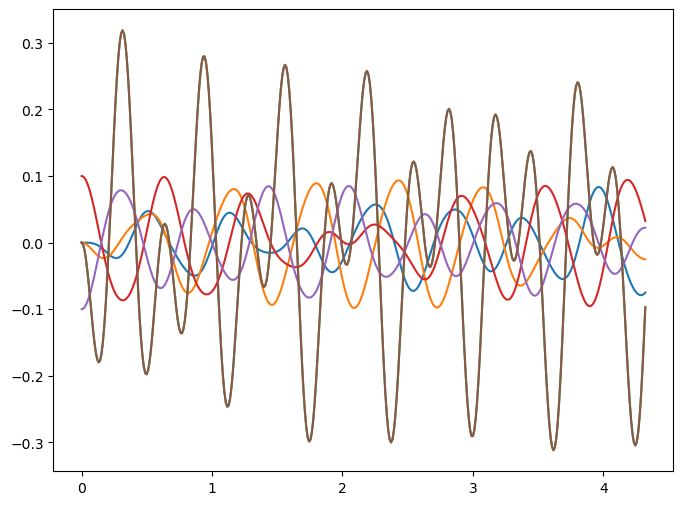

In [15]:
tau = 2*np.pi/ws[0]
ppp = 80 # points per period
ntau = 5 # periods to plot
tend = ntau*tau
ntimes = ntau*ppp
times = np.linspace(0, tend, ntimes)


wt = ws[:,np.newaxis]@times[np.newaxis,:]
Awt = A[:,np.newaxis]*np.cos(wt + phi[:,np.newaxis])

# I need to *really* think this one through
n = Xm.shape[0]
xt = np.zeros_like(Awt)
for freq in range(n):
    xt[:] += Xm[:,freq].reshape(n,1)*Awt[freq,:]   

fig2, ax2 = plt.subplots()
fig2.set_size_inches(8,6)
_ = plt.plot(times, xt.T)

## Animação


In [16]:
# Original positions. Be careful angles are in degrees!
o1 = np.array([-b2, -h2])
o2 = o1 + np.array([2*h, 0.0])
r1 = Rectangle(o1, b, h, angle=0.0, rotation_point='center')
r2 = Rectangle(o2, b, h, angle=0.0, rotation_point='center', fc='red')

# Plot setup
fig3, ax3 = plt.subplots()
fig3.set_size_inches(8,6)
ax3.set_xlim([-h,3*h])
ax3.set_ylim([-h, h])
ax3.xaxis.set_major_locator(ticker.NullLocator())
ax3.yaxis.set_major_locator(ticker.NullLocator())
ax3.set_title(f'Resposta')

# Plot original position
ax3.add_patch(r1)
ax3.add_patch(r2)

def animate(i):
    r1.set_xy(o1+xt[0:2,i])
    r1.angle = np.degrees(xt[2,i])
    r2.set_xy(o2+xt[3:5,i])
    r2.angle = np.degrees(xt[5,i])
    return r1, r2

anim = animation.FuncAnimation(fig3, animate,
                               frames=xt.shape[1], 
                               interval=50,
                               blit=True)
plt.close(fig3)

In [17]:
IPython.display.HTML(anim.to_html5_video())